<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Practice day #1: ES models </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Info</h1> 
This is first laboratory task for the course TSA.
The Lab is desinged to impove skills of tuning parameters of ES models and get experience of coding of simple Regression Models.

The Lab should take about 5-6 hours to be completed.

<h1 align="center">Important Info</h1> 
- <span style="font-size: 14pt;"> You must send your solution to the email </span> <span style="color:red; font-size: 12pt;">alexromsput@gmail.com, </span>
- The theme of your message must be <span style="color:red; font-size: 12pt;"> TSA-Erevan-2017-[Your Surname] </span>, for exmaple -- TSA-Erevan-2017-Romanenko,
- The file in attachment of the letter must be named as <span style="color:red; font-size: 12pt;"> [Surname]-[Group]-Lab1.ipnb</span>, for example -- Romanenko-Evening-Lab1.ipnb,
  
<span style="color:red; font-size: 14pt;"> DEADLINE: 7 June 2017 23:59:59 </span>


<h1 align="center">1. Realization of ES models(50%)</h1>
Solve the task fo Prcatice Day 1 and put you solution (that means cells and outputs) below

<h1 align="center">2. Forecasting real TS (50%)</h1>

* I.   Download datasets (see Student ID in sheet 'Notes' <a href="https://drive.google.com/open?id=11-lzxxR0aeBmEDGEW1GiIaP4X3fyCTHxTg4b0wALpzs">here </a>) and put it into pandas Data Frame:
     - for those whose Student ID = 0 mod 3 - <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep36.csv</span> 
     - for those whose Student ID = 1 mod 3 - <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep42.csv</span> 
     - for those whose Student ID = 2 mod 3 - <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep6.csv </span>
     
<a href='https://1drv.ms/f/s!AqGgzb5T4tvShZ1-xS0s6FhP5x-05g'>link to the folder with datasets</a>

Answer questions: are there TS with seaonality in data? which is the seasonality period?
(Hint: you just need to look at aggregate data by each shop).

* II. Define the beginning of the history and the end of the history of TS (for TS_dep36.csv the beginning is 12.05.2005, the end is 13.06.2006)
    
* III. For TS_dep36.csv Find the best ES algorithm (it means ES model + its optimal parameters) for each TS by next sheme:
     
     
     - 0) Use only following ES models: IES (see seminar 2), AES (see seminar 2), Winters with additive seasonality (see Practice Day 1 task 3), Theil-Wage (see Practice Day 1 task 4).
     
     
     - 1) forecasting delay $h = 1$, loss function is MACAPE;
     
     
     - 2) For all models find optimal params of each ES models using first 75% of dates (for TS_dep36.csv from 12.05.2005 to 12.03.2006);
     
     
     - 3) forecast each TS by each ES Model with optimal params using first 90% of dates (for TS_dep36.csv from 12.05.2005 to 30.04.2006);
     - 4) find the optimal ES algorithm: just compare losses of ES models with optimal params calclated for dates that were not used for tuning parameters (for TS_dev36.csv: from 13.03.2006 to 30.04.2006).
    
    You need to remember optimal ES algorithm for each TS!
    
     - 5) Build barchar (histogram) of losses of optimal ES algorithm (were calulated at step before) for all TS (axis x - value of loss, axis y - percentage of TS that have such loss). Here you must exclude those TS which has only NaNs in period under consideration.
            
* IV. Calculate Forecast for each TS by optimal TS algorithm that you find in step 3 for all dates (for TS_dep36.csv from 12.05.2005 to 13.06.2006). 

       
     - 1) Measure accuracy (loss) of forecast for each TS using dates that were not used in step 2)-3) (for TS_dep36.csv from 12.05.2005 to 12.03.2006), here you must exclude those TS which has only NaNs in the end.
    
     - 2) Build barchar (histogram) of losses of optimal ES algorithm for all TS (axis x - value of loss, axis y - percentage of TS that has such loss), here you must exclude those TS which has only NaNs in period under consideration.

     - 3) Are barcharts calculated in step III.4) and in step IV.2) the same? If they differ than say in what manner.

In [41]:
# start with this code
import statsmodels.api as sm
import pandas as pd
import numpy as np
import math
from datetime import datetime, timedelta
from utils import qualityRMSE, qualityMedianAE
from utils import ExponentialSmoothing
import matplotlib.pyplot as plt
import ast

%matplotlib inline

data = pd.read_csv('data/TS_dep36.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)

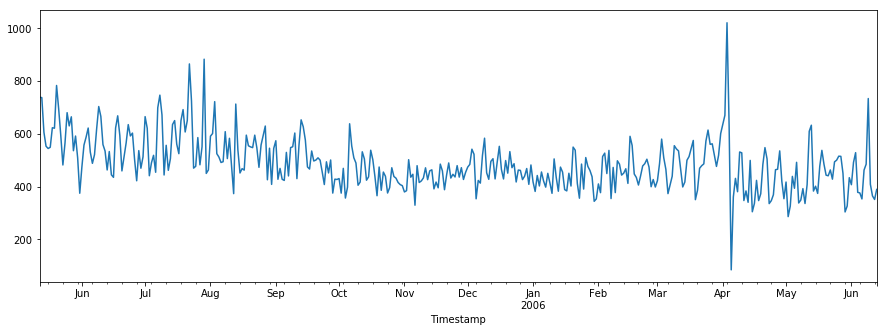

In [42]:
ts = pd.read_csv('data\TS_dep36.csv', sep=';', decimal=',', index_col='Timestamp', parse_dates=True, dayfirst=True)
ts.sum(axis = 1).plot(figsize=(15,5))
ts36 = ts.sum(axis = 1)

In [43]:
ts = ts.loc['05.12.2005':'06.13.2006']
ts_train = ts.loc[:'03.12.2006']
ts_valid = ts.loc['03.12.2006':'04.30.2006']
ts_test = ts.loc['04.30.2006':'06.13.2006']

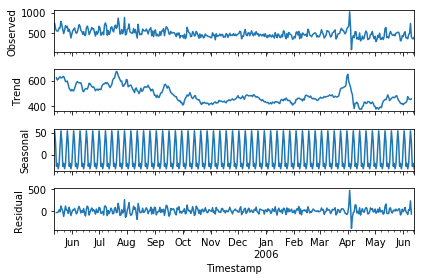

In [44]:
res = sm.tsa.seasonal_decompose(ts36.resample('D').mean())
resplot = res.plot()

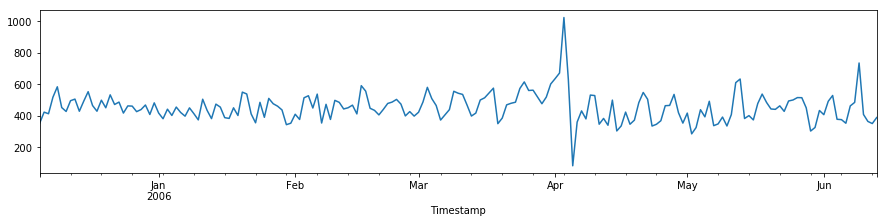

In [14]:
ts1 = ts36.loc['2005-12-05':'2006-12-03']
ts1.plot(figsize=(15,3))

ts1 = ts.loc['2005-12-05':'2006-12-03']

In [58]:
def qualityMACAPE(x,y):
    qlt = (2*(x-y).abs()/(x+y)).replace([np.inf, -np.inf], np.nan)
    return qlt.mean() , (x-y).abs()
def MSE(x,y):
    x = np.nan_to_num(x)
    y = np.nan_to_num(y)
    return  np.mean(np.abs(x-y))

In [19]:
def best_parameters(ts, model, params,name, h = 1):
    ALPHA = params
    FRC_TS = dict()
    ts1 = pd.DataFrame(ts)
    i=0
    for cntr in ts1.columns:
        loss = np.Inf
        alp  = {}
        for alpha in ALPHA:
            mdl = np.array(model(ts1[cntr], h, alpha))
            loss_new = MSE(mdl[1:], np.array(ts1[cntr]))
            if float(loss_new)<float(loss):
                loss = loss_new
                alp = alpha
        FRC_TS[str(cntr)] = alp, loss_new, name
    return FRC_TS

## Init Exponential Smoothing

In [20]:
# models
def InitExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    AdaptationPeriod=Params['AdaptationPeriod']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = x[0]
    t0=0
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                y=x[t]
                t0=t
            if (t-t0+1)<AdaptationPeriod:
                y = y*(1-alpha)*(t-t0+1)/(AdaptationPeriod) + (1-(1-alpha)*(t-t0+1)/(AdaptationPeriod))*x[t]
            else:
                y = y*(1-alpha) + alpha*x[t]
            #else do not nothing
        FORECAST[t+h] = y
    return FORECAST

In [21]:
from sklearn.grid_search import ParameterGrid
param_grid = {'alpha': np.arange(0.05,1.00,0.10), 'AdaptationPeriod': [40,50,80,100]}
grid = ParameterGrid(param_grid)

best_init = best_parameters(pd.DataFrame(ts_train),InitExponentialSmoothing, list(grid), 'init')

In [107]:
loss_init = dict()
h = 1
for key in best_init:
    a = best_init[key][0]
    param = best_init[key]
    mdl = np.array(InitExponentialSmoothing(ts_valid[(key)], h, best_init[key][0]))
    loss = MSE(mdl[1:], np.array(ts_valid[key]))
    loss_init[key] = loss, param[0], 'init'

## Adaptive Exponential Smoothing

In [64]:
def AdaptiveExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    gamma = Params['gamma']
    AdaptationPeriod=Params['AdaptationPeriod']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = np.NaN
    t0= np.NaN
    e1= np.NaN
    e2= np.NaN
    Kt_1 = alpha
    K=alpha
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                y=x[t]
                t0=t
                e1=alpha
                e2 = 1
            else:
                if (t-t0)<h:
                    e1 = gamma*(x[t]-y)+(1-gamma)*e1
                    e2 = gamma*np.abs(x[t]-y)+(1-gamma)*e2
                else:
                    e1 = gamma*(x[t]-FORECAST[t])+(1-gamma)*e1
                    e2 = gamma*np.abs(x[t]-FORECAST[t])+(1-gamma)*e2
            
            if e2==0:
                K=alpha
            else:
                K=np.abs(e1/e2)

            alpha=Kt_1
            Kt_1=K

            if (t-t0+1)<AdaptationPeriod:
                y = y*(1-alpha)*(t-t0+1)/(AdaptationPeriod) + (1-(1-alpha)*(t-t0+1)/(AdaptationPeriod))*x[t]
            else:
                y = y*(1-alpha) + (alpha)*x[t]
        FORECAST[t+h] = y
    return FORECAST

In [74]:
from sklearn.grid_search import ParameterGrid
param_grid = {'alpha': np.arange(0.05,1.05,0.10), 'gamma': np.arange(0.05,1.05,0.10), 'AdaptationPeriod': [100]}
grid = ParameterGrid(param_grid)

best_adapt = best_parameters(pd.DataFrame(ts_train),AdaptiveExponentialSmoothing, list(grid), 'adaptive')

In [108]:
loss_adapt = dict()
h = 1
for key in best_adapt:
    a = best_adapt[key][0]
    param = best_adapt[key]
    mdl = np.array(AdaptiveExponentialSmoothing(ts_valid[(key)], h, best_adapt[key][0]))
    loss = MSE(mdl[1:], np.array(ts_valid[key]))
    loss_adapt[key] = loss_adapt, param[0],  'adapt'

## Winters model with additive Seasonality

In [68]:
def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    l= x[0]
    s= [0]* (p)
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr] 
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= s([(cntr-1)%p]) 
            l_old = l
            l = l*(1-alpha) + alpha*(x[cntr]-s[cntr % p])
            s[cntr % p] = (1-delta)*s[cntr % p] + delta *(x[cntr]-l_old)
        
        FORECAST[cntr+h] = l + s[(cntr+h)% p]
    return FORECAST

In [69]:
from sklearn.grid_search import ParameterGrid
param_grid = {'alpha': np.linspace(0.05,1.05,11), 'delta': np.linspace(0.05,1.05,11), 'seasonality_period': [7]}
grid = ParameterGrid(param_grid)

best_winter = best_parameters(pd.DataFrame(ts_train),WintersExponentialSmoothing, list(grid),'winter')

In [109]:
loss_winter = dict()
h = 1
for key in best_winter:
    a = best_winter[key][0]
    param = best_adapt[key]
    mdl = np.array(WintersExponentialSmoothing(ts_valid[(key)], h, best_winter[key][0]))
    loss = MSE(mdl[1:], np.array(ts_valid[key]))
    loss_winter[key] = loss, param[0], 'winter'

##  Theil-Wage model

In [71]:
def WageExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    beta = Params['beta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    l= x[0]
    b = 0
    s= [0]* (p)
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l = x[cntr]
            
            if math.isnan(s[cntr % p]):
                s[cntr % p] = s([(cntr-1)%p])
            l_old = l
            l = (l+b)*(1-alpha) + alpha*(x[cntr]-s[cntr % p])
            b = beta * (l-l_old) + (1-beta) * b
            s[cntr % p] = (1-delta)*s[cntr % p] + delta *(x[cntr]-l)
            
        FORECAST[cntr+h] = l+ b + s[(cntr+h)% p]
    return FORECAST

In [72]:
from sklearn.grid_search import ParameterGrid
param_grid = {'alpha': np.arange(0.05,1.05,0.20), 'delta': np.arange(0.05,1.05,0.20),'beta': np.arange(0.05,1.05,0.20), 'seasonality_period': [7]}
grid = ParameterGrid(param_grid)

best_wage = best_parameters(pd.DataFrame(ts_train),WageExponentialSmoothing, list(grid), 'adaptive')

In [110]:
loss_wage = dict()
h = 1
for key in best_wage:
    a = best_wage[key][0]
    param = best_wage[key]
    mdl = np.array(WageExponentialSmoothing(ts_valid[(key)], h, best_wage[key][0]))
    loss = MSE(mdl[1:], np.array(ts_valid[key]))
    loss_wage[key] = loss, param[0], 'wage'

# Best model

In [111]:
best = dict()
dicts = [loss_init, loss_adapt, loss_winter, loss_wage]
for key in loss_init:
    c = [i[key][0] for i in dicts]
    best[key] = dicts[np.argmin(c)][key]

In [112]:
best[key]

(0.024897041250774563,
 {'AdaptationPeriod': 100, 'alpha': 0.95000000000000018},
 'init')

In [113]:
losses = []
for key in best:
    losses.append((best[key])[0])

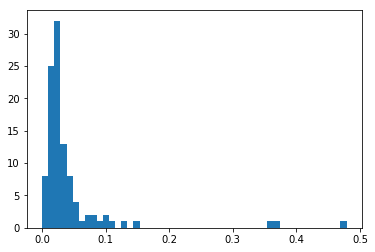

In [114]:
hist1 = plt.hist([i for i in losses if i < 0.5], bins=50)

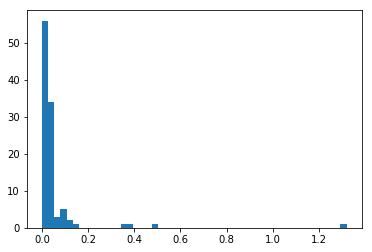

In [115]:
hist1 = plt.hist([i for i in losses], bins=50)

In [118]:
best_test = dict()
for key in best_wage:
    if (best[key])[2] is 'init':
        mod_func = InitExponentialSmoothing
    elif (best[key])[2] is 'adapt':
        mod_func = AdaptiveExponentialSmoothing
    elif (best[key])[2] is 'wage':
        mod_func = WageExponentialSmoothing
    else:
        mod_func = WintersExponentialSmoothing
        
    mdl = np.array(mod_func(ts_test[key], h, best[key][1]))
    loss = MSE(mdl[1:], np.array(ts_test[key]))
    
    best_test[key] = best[key][0], best[key][1], loss 

In [120]:
losses_t = []
for key in best_test:
    losses_t.append((best_test[key])[2])

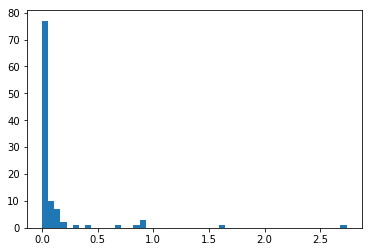

In [122]:
hist2 = plt.hist([i for i in losses_t], bins=50)

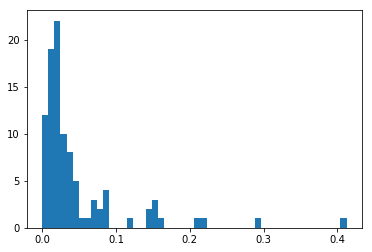

In [121]:
hist2 = plt.hist([i for i in losses_t if i < 0.5], bins=50)